##### Analyst Test -Part2:
###### Use the data set provided to answer the questions below:
    1. How the workload of the not completed tasks divided among the Care Cordinators?
    2. How long it takes on average to complete each category of task for the tasks created in 2018?
    
    A. To answer question 1:
    1. we should first extract information from the 'Status' field where the tasks aren't completed.
    2. Upload the "Care Coordinators Names" file, use the .info() method to identify the names of the care coordinators.
    3. Use the .value_counts() method on the "Assigned To" attribute to extract the list of people that work on uncompleted tasks.
    4. Identify the name of the care coordinators and the number of tasks uncompleted assigned to them.
   
    B. To answer question 2: 
    1. Subset the "Status" attribute where tasks are completed.
    2. Extract the tasks on "Created on" where date is >2018-01-01 & date <= 2018-12-31 (tasks created in 2018)
    3. Compute the 'duration' where tasks are completed in the year 2018.


#### 1. Workload of uncompleted tasks among Care Coordinators
#### 1.a Import necessary packages, upload files, and perform data cleaning

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Upload Analyst_Test_Tasks.csv
tasks = pd.read_csv('Analyst_Test_Tasks.csv')
tasks.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Create by,Updated on,Next Appt Date,HC20 Status,HC20 Substatus,Stratification level,Last Appointment Date
0,60094576,Specimen Collection,Complete,20,MOXXIadmin,2016-07-22T14:14:20,Neilsolomon,2018-03-28T21:14:32,NaN,NaN,NaN,NaN,2016-08-05 21:30:00
1,59946176,Phone Call,Complete,20,MOXXIadmin,2016-08-25T20:07:00,nsome,2018-03-28T21:14:32,2018-07-26T17:00:00.000Z,Enrolled,Scheduled,High,2018-06-20 21:30:00
2,59740292,Phone Call,Complete,20,MOXXIadmin,2016-08-29T18:23:10,nsome,2018-03-28T21:14:32,2018-03-30T15:30:00.000Z,Disenrolled,Ineligible - insurance,NaN,2018-02-21 19:15:00
3,60121538,Phone Call,Complete,20,MOXXIadmin,2016-09-02T15:08:08,nsome,2018-03-28T21:14:32,NaN,Disenrolled,Ineligible - insurance,NaN,2018-03-13 16:55:00
4,60121538,NaN,Complete,20,MOXXIadmin,2016-09-06T08:54:44,nsome,2018-03-28T21:14:32,NaN,Disenrolled,Ineligible - insurance,NaN,2018-03-13 16:55:00


In [3]:
# Overview the info on tasks set
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3659 entries, 0 to 3658
Data columns (total 13 columns):
Patient drchrono ID      3659 non-null int64
Category                 3445 non-null object
Status                   3659 non-null object
Priority                 3659 non-null int64
Assigned To              3598 non-null object
Created on               3659 non-null object
Create by                2961 non-null object
Updated on               3659 non-null object
Next Appt Date           2411 non-null object
HC20 Status              3646 non-null object
HC20 Substatus           3646 non-null object
Stratification level     621 non-null object
Last Appointment Date    3659 non-null object
dtypes: int64(2), object(11)
memory usage: 371.7+ KB


In [4]:
# Check for null value (NAN)
tasks.isnull().sum()

Patient drchrono ID         0
Category                  214
Status                      0
Priority                    0
Assigned To                61
Created on                  0
Create by                 698
Updated on                  0
Next Appt Date           1248
HC20 Status                13
HC20 Substatus             13
Stratification level     3038
Last Appointment Date       0
dtype: int64

In [5]:
# Drop columns: Stratification level, Next Appt Date, Created by because we don't need them for the purpose of this project
# and because there are huge missing values in them
tasks.drop(['Stratification level', 'Next Appt Date','Create by'],axis =1, inplace=True)

In [6]:
# Remove rows where values = nan
tasks.dropna(inplace=True)

In [7]:
# Check the table after data cleaning
tasks.isnull().sum()

Patient drchrono ID      0
Category                 0
Status                   0
Priority                 0
Assigned To              0
Created on               0
Updated on               0
HC20 Status              0
HC20 Substatus           0
Last Appointment Date    0
dtype: int64

In [67]:
# Check how many categories in Status and the number of each category
tasks['Status'].value_counts()

Complete       2494
In Progress     633
Open            149
On Hold          58
Authorized       39
Back to PCP       3
Name: Status, dtype: int64

#### 1.b  Name list and the number of uncompleted cases assigned to them

In [68]:
# Check how many people are assigned to modify the dataset
tasks['Assigned To'].value_counts()

MOXXIadmin          2317
suzztasharma         203
gblandon             189
marlenegarcia        163
CareCoordinators     110
pvallejo             108
aarreola              92
darzate               68
kelder                15
aalmanza              15
mdavis07              12
cmathews              11
kapostol               9
ebenons                7
HRubin                 7
epopoca                6
Neilsolomon            5
nsome                  4
stinajero              4
hanzaldua              4
ggardner               4
mduarte                4
hcolomer               3
AmandaMay              3
egragnani              2
mariadperez            2
GFedalizo              1
CMiranda               1
alexgerson             1
cristianpacheco        1
DanaLewis              1
MyrnaGonzalez          1
aglaros                1
CSobrian               1
mikejimenez            1
Name: Assigned To, dtype: int64

##### Note:  Most assignees are in Administration, followed by CareCoordinators

#### 1.c  List of tasks where Status = Not complete

In [69]:
# Check for uncomplete task
tasks_unfinished = tasks.loc[tasks['Status'] !='Complete']
tasks_unfinished.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
262,69026616,Referral,In Progress,20,aarreola,2017-10-13T13:49:15,2018-06-28T19:27:28,Enrolled,Scheduled,2018-05-17 16:00:00
368,69321260,Medical Records Request,On Hold,20,CareCoordinators,2017-11-30T16:25:15,2018-07-09T11:44:21,Enrolled,Appt completed,2018-06-01 18:00:00
377,68793552,Medical Records Request,On Hold,20,cmathews,2017-12-04T13:10:20,2018-06-25T16:08:44,Enrolled,Scheduled,2018-07-06 20:15:00
391,67917278,Medical Records Request,In Progress,20,suzztasharma,2017-12-06T14:17:21,2018-06-19T17:21:40,Enrolled,Scheduled,2018-06-08 19:15:00
427,70296028,Medical Records Request,In Progress,40,suzztasharma,2017-12-11T20:02:23,2018-06-08T17:41:18,Enrolled,Scheduled,2018-07-09 20:30:00


#### 1.d List of name/department and the number of unfinished cases that are assigned to them

In [70]:
# Check who weren't complete the status they were assigned to
tasks_unfinished['Assigned To'].value_counts()

suzztasharma        198
marlenegarcia       152
gblandon            132
CareCoordinators     95
aarreola             83
pvallejo             80
darzate              68
cmathews             10
aalmanza              7
kapostol              7
ebenons               6
HRubin                6
Neilsolomon           5
ggardner              4
hanzaldua             4
mduarte               4
stinajero             4
nsome                 3
epopoca               3
MOXXIadmin            3
mariadperez           2
DanaLewis             1
hcolomer              1
kelder                1
egragnani             1
mdavis07              1
MyrnaGonzalez         1
Name: Assigned To, dtype: int64

In [71]:
# Name of Care Coordinators from the Care Coordinator Names data set
CareCoordiantor_Names = pd.read_csv('Care Coordinator Names.csv')
CareCoordiantor_Names

,There are 7 care coordinators:
0,Aarreola
1,Pvallego
2,marlenegarcia
3,suzztasharma
4,CareCoordinators
5,darzate
6,gblandon


### Conclusion:  Uncompleted Workload divided among Care Coordinators and the number of cases they are assigned to
1. suzztasharma        198
2. marlenegarcia       152
3. gblandon            133
4. CareCoordinators     95
5. aarreola             83
6. pvallejo             80
7. darzate              68

    . Suzztasharm has the large amount of uncompleted tasks, Darzate has the least uncomppleted tasks


#### 2. Average time to completed tasks by category in the year 2018

##### 2.a Subset 'Status' where tasks = Complete

In [72]:
# Check for the Completed tasks
tasks_completed = tasks.loc[tasks['Status'] =='Complete']
tasks_completed.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
1,59946176,Phone Call,Complete,20,MOXXIadmin,2016-08-25T20:07:00,2018-03-28T21:14:32,Enrolled,Scheduled,2018-06-20 21:30:00
2,59740292,Phone Call,Complete,20,MOXXIadmin,2016-08-29T18:23:10,2018-03-28T21:14:32,Disenrolled,Ineligible - insurance,2018-02-21 19:15:00
3,60121538,Phone Call,Complete,20,MOXXIadmin,2016-09-02T15:08:08,2018-03-28T21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00
5,60794436,Phone Call,Complete,20,MOXXIadmin,2016-09-14T18:30:16,2018-03-28T21:14:32,Closed lead,Ineligible - medical,1970-01-01 00:00:00
6,60121538,Specimen Collection,Complete,20,MOXXIadmin,2016-10-05T18:44:30,2018-03-28T21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00


In [73]:
# check to see how many tasks in the data set (11 categories of tasks)
tasks_completed['Category'].value_counts()

Referral                   866
Phone Call                 592
Pharmacy Request           242
Medical Records Request    207
Lab Results                197
DME                        153
Social Services             81
Specimen Collection         56
Supplies                    47
Transportation              28
Behavioral Health           25
Name: Category, dtype: int64

In [15]:
tasks_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494 entries, 1 to 3654
Data columns (total 10 columns):
Patient drchrono ID      2494 non-null int64
Category                 2494 non-null object
Status                   2494 non-null object
Priority                 2494 non-null int64
Assigned To              2494 non-null object
Created on               2494 non-null object
Updated on               2494 non-null object
HC20 Status              2494 non-null object
HC20 Substatus           2494 non-null object
Last Appointment Date    2494 non-null object
dtypes: int64(2), object(8)
memory usage: 214.3+ KB


In [74]:
# convert to datetime column
tasks_completed['Created on']=pd.to_datetime(tasks_completed['Created on'],format='%Y-%m-%d')
tasks_completed['Updated on']=pd.to_datetime(tasks_completed['Updated on'],format='%Y-%m-%d')


/Users/thoashook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/thoashook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
tasks_completed.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
1,59946176,Phone Call,Complete,20,MOXXIadmin,2016-08-25 20:07:00,2018-03-28 21:14:32,Enrolled,Scheduled,2018-06-20 21:30:00
2,59740292,Phone Call,Complete,20,MOXXIadmin,2016-08-29 18:23:10,2018-03-28 21:14:32,Disenrolled,Ineligible - insurance,2018-02-21 19:15:00
3,60121538,Phone Call,Complete,20,MOXXIadmin,2016-09-02 15:08:08,2018-03-28 21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00
5,60794436,Phone Call,Complete,20,MOXXIadmin,2016-09-14 18:30:16,2018-03-28 21:14:32,Closed lead,Ineligible - medical,1970-01-01 00:00:00
6,60121538,Specimen Collection,Complete,20,MOXXIadmin,2016-10-05 18:44:30,2018-03-28 21:14:32,Disenrolled,Ineligible - insurance,2018-03-13 16:55:00


##### 2.b Subset tasks that are completed in the year 2018

In [27]:
tasked = tasks_completed[(tasks_completed['Created on'] > '2018-01-01 01:00:00') & (tasks_completed['Created on'] <= '2018-12-31 23:00:00')]
tasked.head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date,duration
563,65069468,Phone Call,Complete,20,MOXXIadmin,2018-01-02 11:22:26,2018-03-28 21:15:02,Disenrolled,Ineligible - insurance,2018-04-04 19:50:00,85 days 09:52:36
565,62620150,DME,Complete,20,MOXXIadmin,2018-01-02 15:34:46,2018-05-30 18:59:05,Enrolled,Appt completed,2018-06-22 16:00:00,148 days 03:24:19
567,63200518,Referral,Complete,20,gblandon,2018-01-02 18:06:09,2018-03-28 21:15:02,Enrolled,Scheduled,2018-06-20 18:45:00,85 days 03:08:53
568,63515612,Phone Call,Complete,20,MOXXIadmin,2018-01-03 13:33:59,2018-03-28 21:15:02,Enrolled,Scheduled,2018-07-02 22:50:00,84 days 07:41:03
569,70255162,Phone Call,Complete,20,MOXXIadmin,2018-01-03 17:32:52,2018-03-28 21:15:02,Enrolled,Scheduled,2018-06-28 16:30:00,84 days 03:42:10


In [78]:
tasked.tail()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Created on,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date,duration
3618,63200518,Phone Call,Complete,20,MOXXIadmin,2018-07-12 17:49:36,2018-07-12 18:45:15,Enrolled,Scheduled,2018-06-20 18:45:00,0
3622,74281416,Lab Results,Complete,20,MOXXIadmin,2018-07-12 20:09:40,2018-07-13 20:07:46,Enrolled,Scheduled,2018-07-11 18:05:00,0
3624,74281416,Lab Results,Complete,20,MOXXIadmin,2018-07-12 21:15:54,2018-07-13 18:37:16,Enrolled,Scheduled,2018-07-11 18:05:00,0
3629,64972484,Lab Results,Complete,20,gblandon,2018-07-13 11:16:10,2018-07-13 15:20:30,Enrolled,Scheduled,2018-07-12 19:35:00,0
3654,74177154,Pharmacy Request,Complete,20,MOXXIadmin,2018-07-13 18:35:35,2018-07-13 19:34:59,Enrolled,Scheduled,2018-06-28 22:50:00,0


##### 2.c Compute the duration by substracting started date from ended date

In [28]:
tasked['duration']= tasks_completed['Updated on']- tasks_completed['Created on']

/Users/thoashook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
tasked['duration']

563     85 days 09:52:36
565    148 days 03:24:19
567     85 days 03:08:53
568     84 days 07:41:03
569     84 days 03:42:10
              ...       
3618     0 days 00:55:39
3622     0 days 23:58:06
3624     0 days 21:21:22
3629     0 days 04:04:20
3654     0 days 00:59:24
Name: duration, Length: 2061, dtype: timedelta64[ns]

In [56]:
tasked['duration']=tasked['duration'].dt.days.astype('int16')

/Users/thoashook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


##### 2.d Creating a new dataframe with only two columns: Category and duration

In [ ]:
avg_complete_cat_duration = tasked[['Category','duration']]

##### 2.e Calculate the average duration of each category that are completed in the year 2018

In [59]:
avg_complete_cat_duration.groupby('Category').mean()

,duration
Category,
Behavioral Health,40.583333
DME,51.369128
Lab Results,12.345178
Medical Records Request,35.236559
Pharmacy Request,13.233333
Phone Call,26.100000
Referral,48.578279
Social Services,32.402778
Specimen Collection,41.193548


##### Analyst Test -Part3: 
##### Use the same data set as in part2 to compute the average time for tasks completed in Referral for the last 12 month
    1. Need to know when is the last task completed, and the 12 month period from this date
    2. Subset 'Category' where Category = Referral
    3. Created new dataframe where tasks are completed in the last 12 month
    4. Compute the duration by subtracting "Created on" date from "Updated on" date
    5. Using monthly moving average, . resample('MS') method in time series to graph the monthly averag for the last 12 month in Referral Category

##### New dataframe where tasks are completed in the last 12 months

In [81]:
tasked_12_month = tasks_completed[(tasks_completed['Created on'] > '2017-07-13 01:00:00') & (tasks_completed['Created on'] <= '2018-07-13 23:00:00')]
tasked_12_month.set_index('Created on').head()

,Patient drchrono ID,Category,Status,Priority,Assigned To,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date
Created on,,,,,,,,,
2017-07-13 12:36:07,66358864,Phone Call,Complete,20,MOXXIadmin,2018-03-28 21:14:46,Closed lead,Ineligible - insurance,2017-08-23 15:30:00
2017-07-13 15:46:35,66358864,Phone Call,Complete,20,MOXXIadmin,2018-03-28 21:14:46,Closed lead,Ineligible - insurance,2017-08-23 15:30:00
2017-07-17 14:42:39,60737570,Phone Call,Complete,20,MOXXIadmin,2018-07-05 17:52:09,Enrolled,Appt completed,2018-05-30 17:20:00
2017-07-17 19:02:57,61799850,Phone Call,Complete,20,MOXXIadmin,2018-03-28 21:14:46,Enrolled,Appt completed,2018-05-29 18:50:00
2017-07-18 14:07:35,62884126,Phone Call,Complete,20,MOXXIadmin,2018-03-28 21:14:46,Enrolled,Scheduled,2018-05-30 18:10:00


##### Dataframe where Category = Referral

In [99]:
tasked_12_month = tasked_12_month[tasked_12_month['Category']=='Referral']

In [100]:
tasked_12_month['Created on']= pd.to_datetime(tasked_12_month['Created on'],format='%Y-%m-%d')

In [101]:
tasked_12_month['Updated on']= pd.to_datetime(tasked_12_month['Updated on'],format='%Y-%m-%d')

##### Generated new column 'duration' by subtracting start time by end time for the last 12 months

In [102]:
tasked_12_month['duration']= (tasked_12_month['Updated on']-tasked_12_month['Created on'])
tasked_12_month['duration'].head()

180   243 days 06:01:43
181   279 days 04:51:27
187   245 days 01:31:05
197   225 days 04:09:16
210   212 days 06:23:47
Name: duration, dtype: timedelta64[ns]

In [103]:
tasked_12_month.set_index('Created on', inplace =True)

In [105]:
tasked_12_month.reset_index().head()

,Created on,Patient drchrono ID,Category,Status,Priority,Assigned To,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date,duration
0,2017-07-28 15:13:04,66173232,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:47,Enrolled,Appt completed,2018-01-16 19:15:00,243 days 06:01:43
1,2017-07-28 15:13:59,66173232,Referral,Complete,20,MOXXIadmin,2018-05-03 20:05:26,Enrolled,Appt completed,2018-01-16 19:15:00,279 days 04:51:27
2,2017-08-02 17:15:01,66878548,Referral,Complete,20,MOXXIadmin,2018-04-04 18:46:06,Enrolled - inactive,Temporary - other,2018-01-11 21:00:00,245 days 01:31:05
3,2017-08-15 17:05:33,66416058,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:49,Enrolled,Appt completed,2018-01-19 22:30:00,225 days 04:09:16
4,2017-08-28 14:51:03,67155244,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:50,Disenrolled,Ineligible - insurance,2018-04-30 23:30:00,212 days 06:23:47


In [106]:
tasked_12_month.head(15)

,Patient drchrono ID,Category,Status,Priority,Assigned To,Updated on,HC20 Status,HC20 Substatus,Last Appointment Date,duration
Created on,,,,,,,,,,
2017-07-28 15:13:04,66173232,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:47,Enrolled,Appt completed,2018-01-16 19:15:00,243 days 06:01:43
2017-07-28 15:13:59,66173232,Referral,Complete,20,MOXXIadmin,2018-05-03 20:05:26,Enrolled,Appt completed,2018-01-16 19:15:00,279 days 04:51:27
2017-08-02 17:15:01,66878548,Referral,Complete,20,MOXXIadmin,2018-04-04 18:46:06,Enrolled - inactive,Temporary - other,2018-01-11 21:00:00,245 days 01:31:05
2017-08-15 17:05:33,66416058,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:49,Enrolled,Appt completed,2018-01-19 22:30:00,225 days 04:09:16
2017-08-28 14:51:03,67155244,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:50,Disenrolled,Ineligible - insurance,2018-04-30 23:30:00,212 days 06:23:47
2017-09-22 14:42:31,64133514,Referral,Complete,40,MOXXIadmin,2018-04-16 20:20:49,Enrolled,Appt completed,2017-10-20 17:00:00,206 days 05:38:18
2017-09-22 16:43:52,59761534,Referral,Complete,20,MOXXIadmin,2018-04-06 16:49:19,Enrolled,Scheduled,2017-09-22 20:20:00,196 days 00:05:27
2017-10-03 18:02:28,66236582,Referral,Complete,20,MOXXIadmin,2018-03-28 21:14:54,Disenrolled,Healthy - back to PCP,2018-05-25 00:00:00,176 days 03:12:26
2017-10-10 13:36:13,67817704,Referral,Complete,20,MOXXIadmin,2018-04-04 17:06:29,Enrolled,Scheduled,2018-06-29 19:05:00,176 days 03:30:16


###### Remove columns 'Patient drchrono ID' and 'Priority' since we don't need them

In [107]:
tasked_12_month.drop(['Patient drchrono ID','Priority'], axis=1, inplace=True)

In [108]:
tasked_12_month['duration']=tasked_12_month['duration'].dt.days.astype('int16')

##### Using .resample('MS') method to calculate Referral monthly average for the last 12 months

In [109]:
referral_monthly = tasked_12_month.resample('MS')
referral_monthly_mean = referral_monthly.mean()

In [110]:
referral_monthly_mean

,duration
Created on,
2017-07-01,261.000000
2017-08-01,227.333333
2017-09-01,201.000000
2017-10-01,171.833333
2017-11-01,142.061224
2017-12-01,112.142857
2018-01-01,81.212121
2018-02-01,55.307018
2018-03-01,49.250000


##### Graph the average monthly referral for the last 12 months using matplotlib

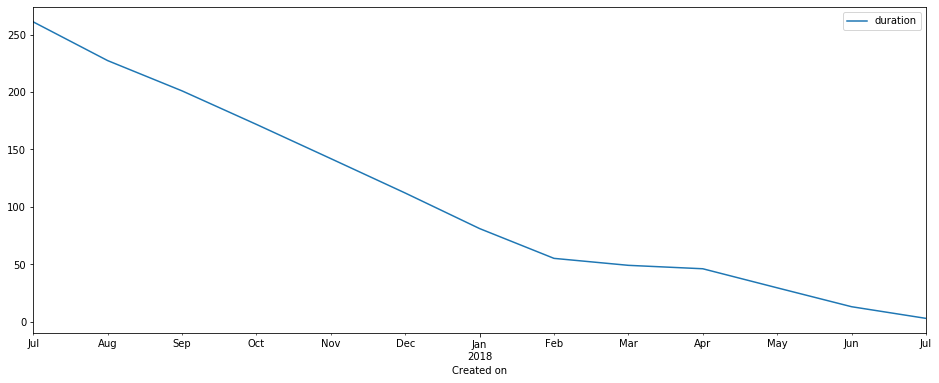

In [111]:
referral_monthly_mean.plot(figsize = (16,6))

### Conclusion: 
    1. Monthly referral gradually descrease from over 250 on July 2017 to a little over 50 on Feb 2018.
    2. It maintains about 50 referrals for three months from Feb 2018 to April 2018,
    3. and then starts to decrease from April 2018 - July 2018.
    . It almost has zero referral on the month of July 2018.